# Predator Analysis: BRCA

## Evaluation on _CGC_



<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Predator\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorAnalysis_BRCA_CGC.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">June 17th, 2022</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

TBA

In [1]:
from IPython.display import display
from PredatorAnalysis import PredatorAnalysis

# Paths
## SNVs
SNV_COMMON_PATH = "../data/snv_datasets/"
SNV_BRCA_PATH = SNV_COMMON_PATH + "SNV_BRCA_hg38_2021-09-22.csv"

PREDICTION_ID = "ed35a3a3/"
PREDICTIONS_COMMON_PATH = "../data/predictions_datasets/brca_prediction_2022-06-17/" + PREDICTION_ID
PREDICTION_BRCA_REDUCED_PATH = PREDICTIONS_COMMON_PATH + "predictions_soft_2022-06-17.csv"

ELASPIC_RESULTS_COMMON_PATH = "../data/Elaspic_merged_results/"  # elaspic_results_datasets
BRCA_CORE_PATH = ELASPIC_RESULTS_COMMON_PATH + "BRCA_Core_2021-11-17.txt"
BRCA_INTERFACE_PATH = ELASPIC_RESULTS_COMMON_PATH + "BRCA_Interface_2021-11-17.txt"

# Patient Interaction data
BRCA_PATIENT_INTERACTION_DATA_PATH = "../data/patient_interaction_datasets/BRCA_patient_interactions_analysis_table_2022-06-17.xlsx"

# CGC GENES
CGC_ALL_PATH = "../data/cgc_genes/all_cgc_synonyms_genes_2021-11-06.txt"
CGC_BREAST_PATH = "../data/cgc_genes/breast_synonyms_genes_2021-11-06.txt"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [2]:
predator_analysis = PredatorAnalysis(
    tcga="brca",
    snv_path=SNV_BRCA_PATH,
    prediction_data_path=PREDICTION_BRCA_REDUCED_PATH,
    prediction_id=PREDICTION_ID,
    elaspic_core_path=BRCA_CORE_PATH,
    elaspic_interface_path=BRCA_INTERFACE_PATH,
    patient_interaction_data_path=BRCA_PATIENT_INTERACTION_DATA_PATH,
    reference_data_name="cgc",
    reference_data_spec_cohort_path=CGC_BREAST_PATH,
    reference_data_path=CGC_ALL_PATH
)

2022-06-17 14:16:52 | INFO     | PredatorAnalysis |  - - Predator Analysis - - 
2022-06-17 14:16:52 | INFO     | PredatorAnalysis | TCGA: brca
2022-06-17 14:16:52 | INFO     | PredatorAnalysis | PREDICTION ID: ed35a3a3/
2022-06-17 14:16:52 | INFO     | helpers.helpers_analysis.loaders | Loading brca SNV datasets ..
2022-06-17 14:16:57 | DEBUG    | helpers.helpers_analysis.loaders | brca SNV data size: (120988, 121)
2022-06-17 14:16:58 | DEBUG    | helpers.helpers_analysis.loaders | brca SNV data processed size: (60251, 121)
2022-06-17 14:16:58 | INFO     | helpers.helpers_analysis.loaders | brca SNV datasets are loaded.
2022-06-17 14:16:58 | INFO     | helpers.helpers_analysis.loaders | Loading brca Prediction dataset ..
2022-06-17 14:16:58 | DEBUG    | helpers.helpers_analysis.loaders | brca Prediction data shape: (3991, 5)
2022-06-17 14:16:58 | INFO     | helpers.helpers_analysis.loaders | brca Prediction dataset is loaded.
2022-06-17 14:16:58 | INFO     | helpers.helpers_analysis.lo

# Datasets

##  1. SNV Datasets

In [3]:
# Original SNV Dataset
print(predator_analysis.data_materials["brca_snv_data"].shape)

(120988, 121)


In [4]:
# Processed SNV Dataset
print(predator_analysis.data_materials["brca_snv_data_processed"].shape)

(60251, 121)


In [5]:
# Simplified SNV Dataset
print(predator_analysis.data_materials["brca_snv_data_simplified"].shape)
predator_analysis.data_materials["brca_snv_data_simplified"].head(3)

(60251, 4)


Hugo_Symbol SWISSPROT HGVSp_Short Tumor_Sample_Barcode
0       USP24    Q9UPU5       I342V         TCGA-D8-A1XY
1      ERICH3    Q5RHP9      E1406K         TCGA-D8-A1XY
2      SPHKAP    Q2M3C7      R1372S         TCGA-D8-A1XY

## 2. ELASPIC Results Datasets

### 2.1. `Core` Datasets

In [6]:
# Core data 
print(predator_analysis.data_materials["brca_elaspic_core_data"].shape)
predator_analysis.data_materials["brca_elaspic_core_data"].head(3)

(20015, 103)


Input_identifier UniProt_ID Mutation Status  Type COSMIC_mut_ID  \
0           P35367     P35367    M206V   done  core   COSM1484451   
1           Q96RQ3     Q96RQ3     R66H   done  core   COSM1041745   
2           O00203     O00203    R227H   done  core   COSM1438700   

  ClinVar_mut_ID UniProt_mut_ID                               Domain_name  \
0              -              -                                     7tm_1   
1              -              -  CPSase_L_chain+CPSase_L_D2+Biotin_carb_C   
2              -              -                                 Adaptin_N   

                                Domain_clan  ... number_of_residues_mut  \
0                                     7tm_1  ...                  458.0   
1  CPSase_L_chain+CPSase_L_D2+Biotin_carb_C  ...                  574.0   
2                                 Adaptin_N  ...                  618.0   

  IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  IntraclashesEnergy2_wt  \
0                      -                        -                       -   
1                      -                        -                       -   
2                      -                        -                       -   

  IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                       -                          -   
1                       -                          -   
2                       -                          -   

  Interface_hydrophilic_area Interface_total_area  \
0                          -                    -   
1                          -                    -   
2                          -                    -   

  Interface_contact_distance_wt Interface_contact_distance_mut  
0                             -                              -  
1                             -                              -  
2                             -                              -  

[3 rows x 103 columns]

In [7]:
# Core data simplified
print(predator_analysis.data_materials["brca_elaspic_core_data_simplified"].shape)
predator_analysis.data_materials["brca_elaspic_core_data_simplified"].head(3)

(20012, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     P35367    M206V                     -
1     Q96RQ3     R66H                     -
2     O00203    R227H                     -

### 2.2 `Interface` Datasets

In [8]:
print(predator_analysis.data_materials["brca_elaspic_interface_data"].shape)
predator_analysis.data_materials["brca_elaspic_interface_data"].head(3)  ## <-- i was here

(7705, 103)


Input_identifier UniProt_ID Mutation Status       Type COSMIC_mut_ID  \
0           P28062     P28062    R216W   done  interface    COSM451277   
1           Q15842     Q15842    E237K   done  interface    COSM430893   
2           Q15842     Q15842    E237K   done  interface    COSM430893   

  ClinVar_mut_ID UniProt_mut_ID Domain_name Domain_clan  ...  \
0              -              -  Proteasome  Proteasome  ...   
1              -              -         IRK         IRK  ...   
2              -              -         IRK         IRK  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                  417.0                156.750                  156.868   
1                  684.0                131.720                  131.479   
2                  678.0                142.706                  142.107   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                 49.1868                 49.1868                    566.065   
1                129.5260                129.5260                       None   
2                 99.1151                 99.1190                       None   

  Interface_hydrophilic_area Interface_total_area  \
0                    367.205               933.27   
1                       None                 None   
2                     624.35                 None   

  Interface_contact_distance_wt  Interface_contact_distance_mut  
0                       5.37939                         3.28969  
1                       2.48410                         2.92169  
2                       2.70474                         3.18529  

[3 rows x 103 columns]

In [9]:
print(predator_analysis.data_materials["brca_elaspic_interface_processed_data"].shape)
predator_analysis.data_materials["brca_elaspic_interface_processed_data"].head(3)

(4137, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     P28062    R216W                P40306
1     Q15842    E237K                Q14654
2     Q15842    E237K                P63252

### 2.3. ELASPIC `Core` and `Interface` Combined

Combine two dataframes:
+ *brca_elaspic_core_data_simplified*
+ *brca_interface_processed*

In [10]:
print('ELASPIC CORE DATA')
display(predator_analysis.data_materials["brca_elaspic_core_data_simplified"].head(3))
print('Data dimensions:', predator_analysis.data_materials["brca_elaspic_core_data_simplified"].shape)

print('\nELASPIC INTERFACE DATA')
display(predator_analysis.data_materials["brca_elaspic_interface_processed_data"].head(3))
print('Data dimensions:', predator_analysis.data_materials["brca_elaspic_interface_processed_data"].shape)

ELASPIC CORE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     P35367    M206V                     -
1     Q96RQ3     R66H                     -
2     O00203    R227H                     -

Data dimensions: (20012, 3)

ELASPIC INTERFACE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     P28062    R216W                P40306
1     Q15842    E237K                Q14654
2     Q15842    E237K                P63252

Data dimensions: (4137, 3)


In [11]:
# ELASPIC Core and Interface Combined
print(predator_analysis.data_materials["brca_elaspic_core_and_interface_data"].shape)
predator_analysis.data_materials["brca_elaspic_core_and_interface_data"].head(3)

(24149, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     P35367    M206V                     -
1     Q96RQ3     R66H                     -
2     O00203    R227H                     -

## 3. Prediction Datasets

**Note**: We decided to drop some entries due to invalid prediction case, thus interface data and prediction data are not the same.

In [12]:
print(predator_analysis.data_materials["brca_prediction_data"].shape)
predator_analysis.data_materials["brca_prediction_data"].head(3)

(3991, 5)


UniProt_ID Mutation Interactor_UniProt_ID  Prediction  Median_Probability
0     P28062    R216W                P40306           0             0.40648
1     Q15842    E237K                Q14654           1             0.52114
2     Q15842    E237K                P63252           1             0.57654

## 4. CGC Genes

In [13]:
print(len(predator_analysis.data_materials['cgc_brca_genes']))
predator_analysis.data_materials['cgc_brca_genes'][:5]  # Including synonyms

254


['EP300', 'N-CoR', '8289', 'O15119', 'PBRM1']

In [14]:
print(len(predator_analysis.data_materials['cgc_all_genes']))
predator_analysis.data_materials['cgc_all_genes'][:5]  # Including synonyms

4878


['8522', 'KMT3G', 'P27635', 'ENSG00000122779.17', 'Q93074']

# Prepare Analysis

In [15]:
predator_analysis.prepare_analysis()

2022-06-17 14:17:11 | DEBUG    | PredatorAnalysis | brca_elaspic_proteins loaded.
2022-06-17 14:17:11 | DEBUG    | PredatorAnalysis | Number of proteins in ELASPIC brca: 8538


Retrieving Gene IDs from UniProt API .. :   0%|          | 0/8538 [00:00<?, ?it/s]

2022-06-17 14:17:12 | DEBUG    | PredatorAnalysis | brca_protein_to_gene_dict loaded.


  0%|          | 0/8538 [00:00<?, ?it/s]

0 	 A0AV96 	 0
1 	 A0AVF1 	 0
2 	 A0AVI2 	 0
3 	 A0AVT1 	 14
4 	 A0FGR9 	 2
2022-06-17 14:17:21 | DEBUG    | PredatorAnalysis | brca_protein_to_num_elaspic_interface_entries loaded.


  0%|          | 0/8538 [00:00<?, ?it/s]

0 	 A0AV96 	 0
1 	 A0AVF1 	 0
2 	 A0AVI2 	 0
3 	 A0AVT1 	 7
4 	 A0FGR9 	 1
2022-06-17 14:17:29 | DEBUG    | PredatorAnalysis | brca_protein_to_num_unique_interactors loaded.
2022-06-17 14:17:29 | DEBUG    | PredatorAnalysis | Number of patients in brca: 985.


## 1. Proteins

$\textit{Proteins} = \textit{ELASPIC Results Core Proteins} + \textit{ELASPIC Results Interface Proteins}$

In [16]:
print('Number of proteins in ELASPIC BRCA:', len(predator_analysis.data_materials["brca_elaspic_proteins"]))

Number of proteins in ELASPIC BRCA: 8538


## 2. Genes

In [17]:
# First 5 elements in protein to gene dictionary
list(predator_analysis.data_materials["brca_protein_to_gene_dict"].items())[:5]

[('A0AV96', 'RBM47'),
 ('A0AVF1', 'TTC26'),
 ('A0AVI2', 'FER1L5'),
 ('A0AVT1', 'UBA6'),
 ('A0FGR9', 'ESYT3')]

## 3. ELASPIC Number of Interface Entries

In [18]:
list(predator_analysis.data_materials["brca_protein_to_num_elaspic_interface_entries"].items())[:5]

[('A0AV96', 0), ('A0AVF1', 0), ('A0AVI2', 0), ('A0AVT1', 14), ('A0FGR9', 2)]

In [19]:
# TP53
predator_analysis.data_materials["brca_protein_to_num_elaspic_interface_entries"]["P04637"]  # 129

129

## 4. ELASPIC Number of Unique Interactors

In [20]:
list(predator_analysis.data_materials["brca_protein_to_num_unique_interactors"].items())[:5]

[('A0AV96', 0), ('A0AVF1', 0), ('A0AVI2', 0), ('A0AVT1', 7), ('A0FGR9', 1)]

In [21]:
# TP53
predator_analysis.data_materials["brca_protein_to_num_unique_interactors"]["P04637"]  # 17

17

## 5. Patients

In [22]:
print(f'Number of patients {len(predator_analysis.data_materials["brca_patients"])}.')  # 985.

Number of patients 985.


# Analysis Table Construction

In [23]:
predator_analysis.construct_analysis_table()

2022-06-17 14:17:43 | DEBUG    | PredatorAnalysis | Adding `PROTEIN` column ..
2022-06-17 14:17:43 | DEBUG    | PredatorAnalysis | Adding `GENE` column ..
2022-06-17 14:17:43 | DEBUG    | PredatorAnalysis | Adding `NUM_ELASPIC_INTERFACE_ENTRIES` column ..
2022-06-17 14:17:43 | DEBUG    | PredatorAnalysis | Adding `NUM_DISRUPTIVE_ENTRIES` column ..
2022-06-17 14:17:56 | DEBUG    | PredatorAnalysis | Adding `NUM_INCR_NOEFF_ENTRIES` column ..
2022-06-17 14:18:05 | DEBUG    | PredatorAnalysis | Adding `NUM_UNIQUE_INTERACTORS` column ..
2022-06-17 14:18:05 | DEBUG    | PredatorAnalysis | Adding `PATIENT_CORE_COUNT` column ..


  0%|          | 0/985 [00:00<?, ?it/s]

2022-06-17 14:27:17 | DEBUG    | PredatorAnalysis | Adding `PATIENT_INTERFACE_COUNT` column ..


  0%|          | 0/985 [00:00<?, ?it/s]

2022-06-17 14:39:09 | DEBUG    | PredatorAnalysis | Adding `NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR` column ..
2022-06-17 14:39:42 | DEBUG    | PredatorAnalysis | Adding `BASELINE` and `OUR_METHOD` columns ..
Adding +0 when `core_flag=1`


  0%|          | 0/985 [00:00<?, ?it/s]

2022-06-17 14:52:29 | DEBUG    | PredatorAnalysis | Adding `OUR_METHOD / BASELINE` column ..
2022-06-17 14:52:29 | DEBUG    | PredatorAnalysis | Adding `ELASPIC_COVERAGE` column ..


  0%|          | 0/985 [00:00<?, ?it/s]

2022-06-17 15:04:02 | DEBUG    | PredatorAnalysis | Adding Reference Dataset Columns: General and Cohort Specific columns ..
2022-06-17 15:04:04 | DEBUG    | PredatorAnalysis | brca_preliminary_data is constructed.


In [25]:
predator_analysis.data_materials["brca_preliminary_data"]

PROTEIN      GENE  NUM_ELASPIC_INTERFACE_ENTRIES  NUM_DISRUPTIVE_ENTRIES  \
0     A0AV96     RBM47                              0                       0   
1     A0AVF1     TTC26                              0                       0   
2     A0AVI2    FER1L5                              0                       0   
3     A0AVT1      UBA6                             14                       3   
4     A0FGR9     ESYT3                              2                       1   
...      ...       ...                            ...                     ...   
8533  Q9Y6X6     MYO16                              2                       1   
8534  Q9Y6X8      ZHX2                              0                       0   
8535  Q9Y6Y0  IVNS1ABP                              0                       0   
8536  Q9Y6Y1    CAMTA1                              0                       0   
8537  Q9Y6Z7   COLEC10                              0                       0   

      NUM_INCR_NOEFF_ENTRIES  NUM_UNIQUE_INTERACTORS  PATIENT_CORE_COUNT  \
0                          0                       0                   2   
1                          0                       0                   1   
2                          0                       0                   6   
3                         11                       7                   4   
4                          1                       1                   1   
...                      ...                     ...                 ...   
8533                       1                       2                  12   
8534                       0                       0                   1   
8535                       0                       0                   1   
8536                       0                       0                   1   
8537                       0                       0                   1   

      PATIENT_INTERFACE_COUNT  NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR  \
0                           0                                             0   
1                           0                                             0   
2                           0                                             0   
3                           5                                             3   
4                           2                                             1   
...                       ...                                           ...   
8533                        1                                             1   
8534                        0                                             0   
8535                        0                                             0   
8536                        0                                             0   
8537                        0                                             0   

      BASELINE  OUR_METHOD  OUR_METHOD/BASELINE  ELASPIC_COVERAGE CGC_STATUS  \
0            0           0                  NaN                 2          -   
1            0           0                  NaN                 1          -   
2            0           0                  NaN                 6          -   
3           14           3             0.214286                 9          -   
4            2           1             0.500000                 3          -   
...        ...         ...                  ...               ...        ...   
8533         2           1             0.500000                13          -   
8534         0           0                  NaN                 1          -   
8535         0           0                  NaN                 1          -   
8536         0           0                  NaN                 1          +   
8537         0           0                  NaN                 1          -   

     CGC_STATUS (BRCA)  
0                    -  
1                    -  
2                    -  
3                    -  
4                    -  
...                ...  
8533                 -  
8534     

# ROC Curve Analysis

2022-06-17 15:06:05 | DEBUG    | PredatorAnalysis | Plotting ROC Curves ..


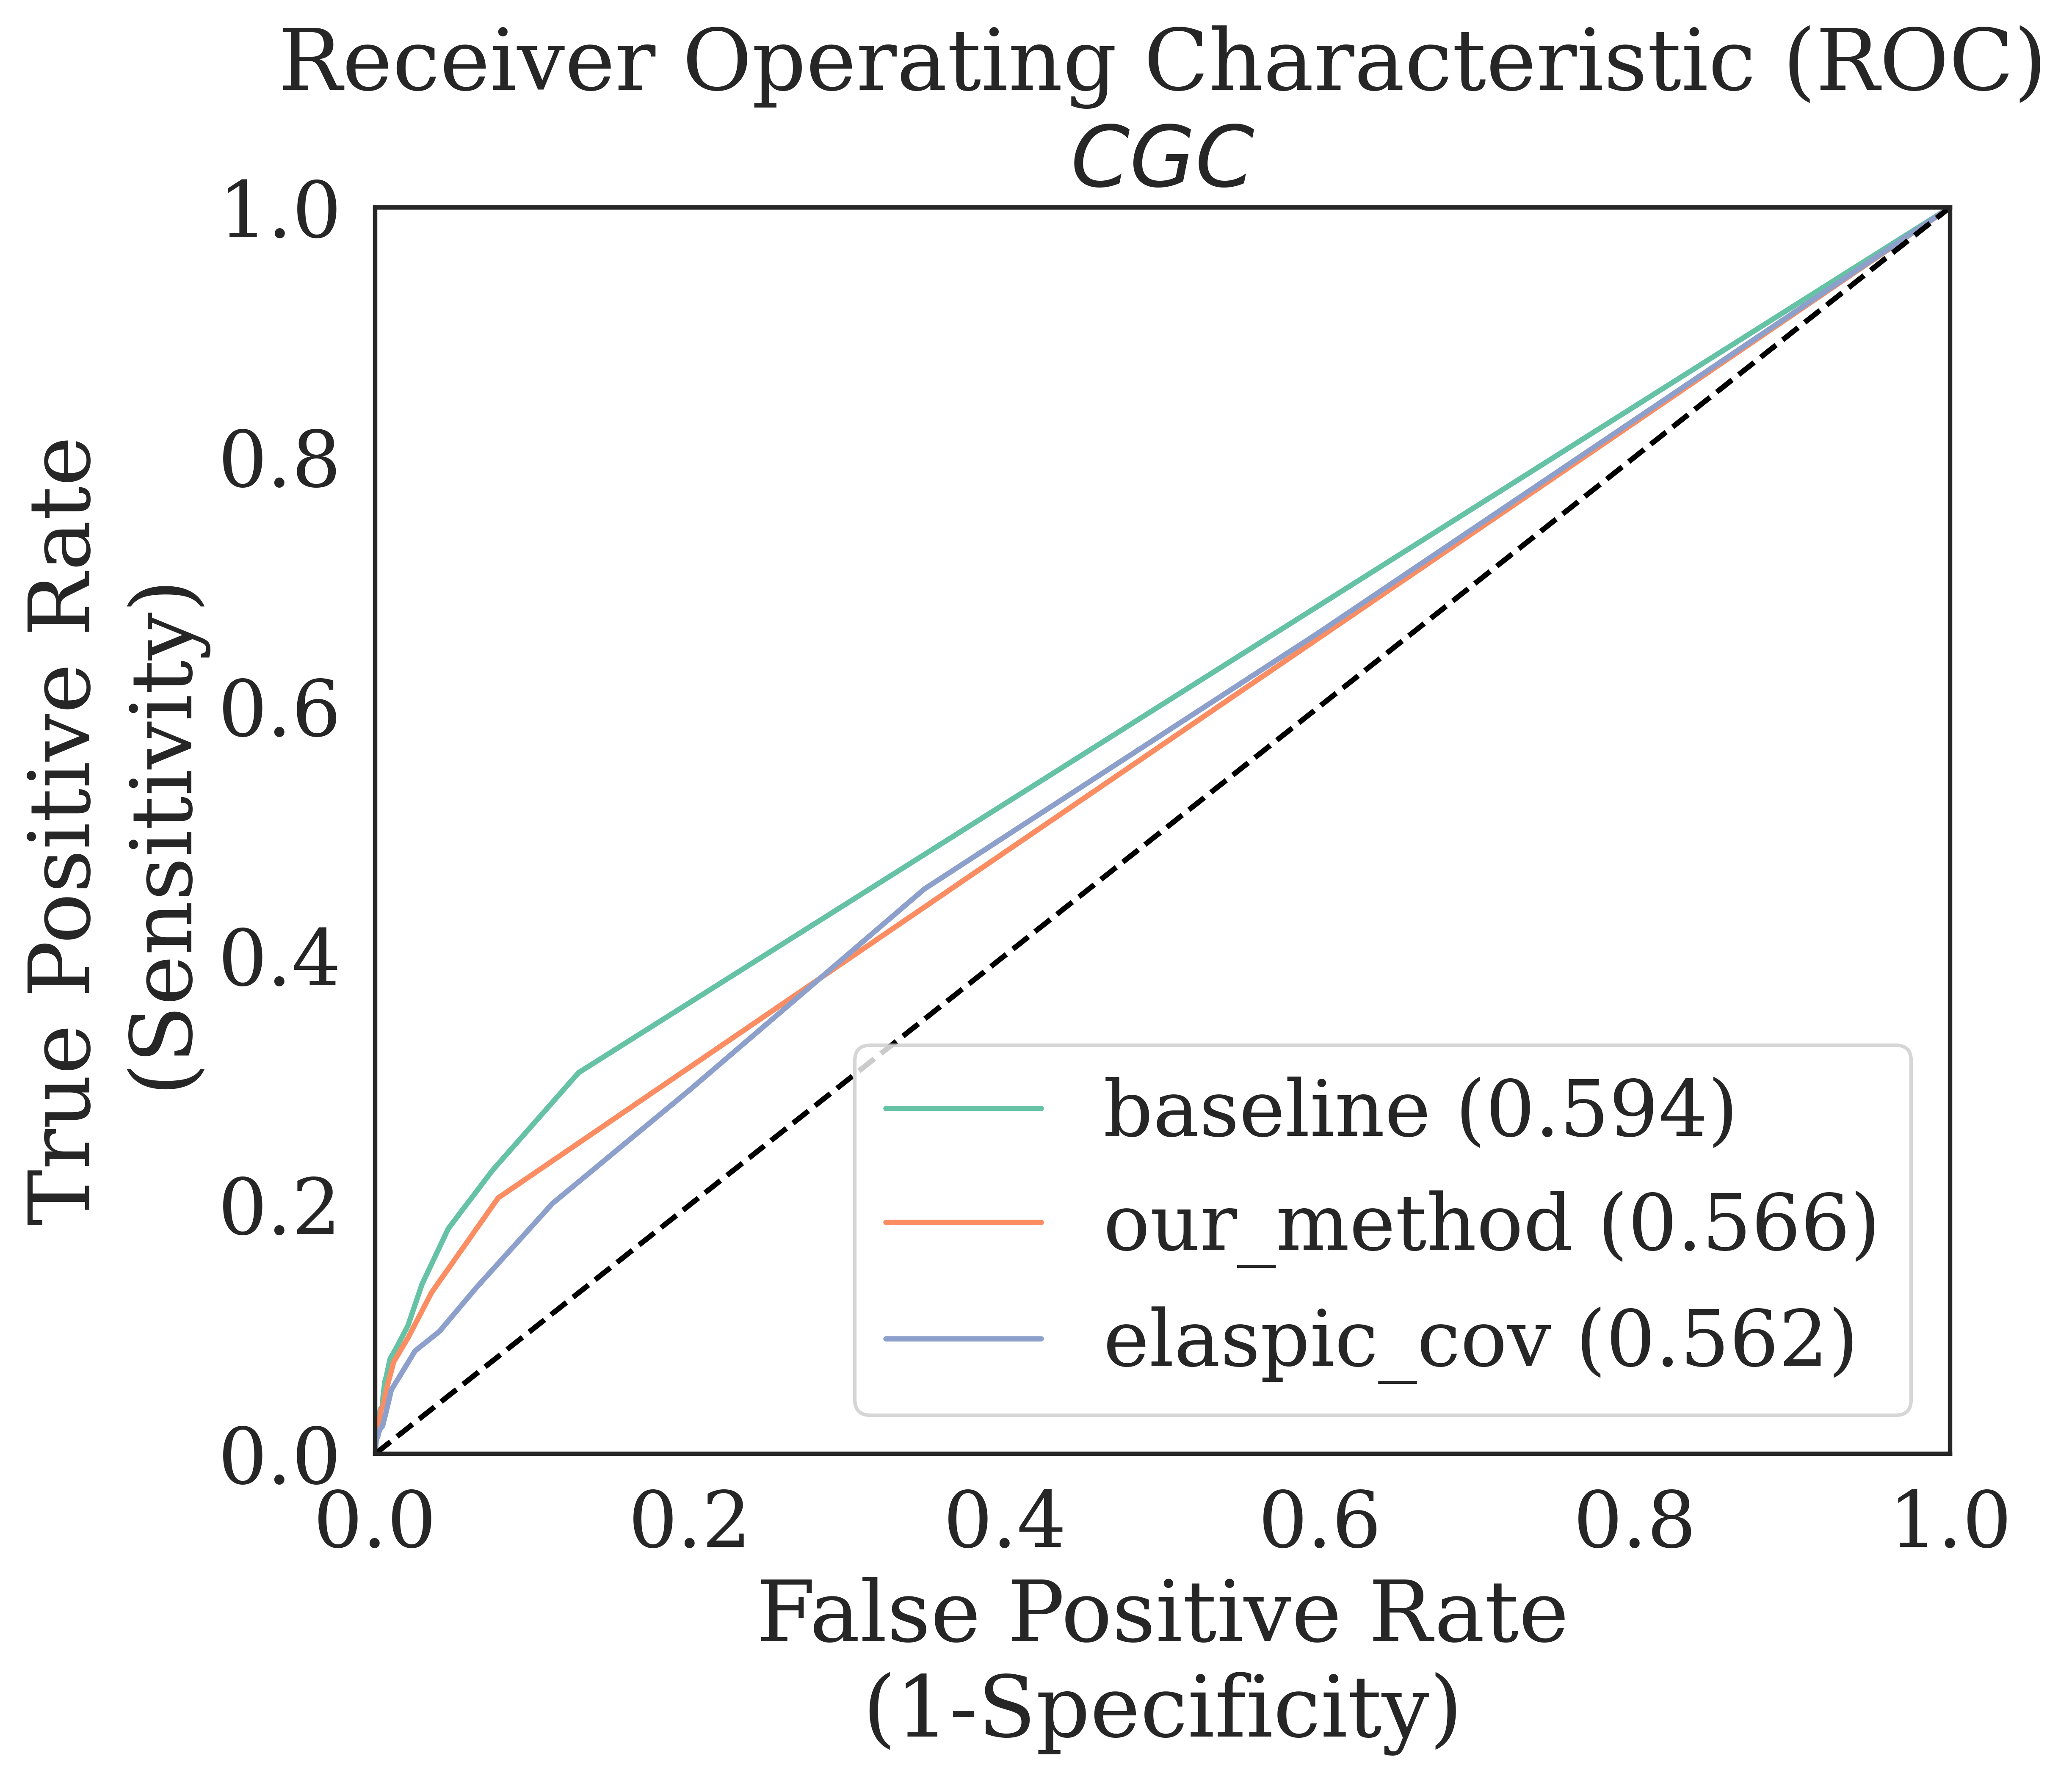

2022-06-17 15:06:10 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.594
2022-06-17 15:06:10 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.566
2022-06-17 15:06:10 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.562


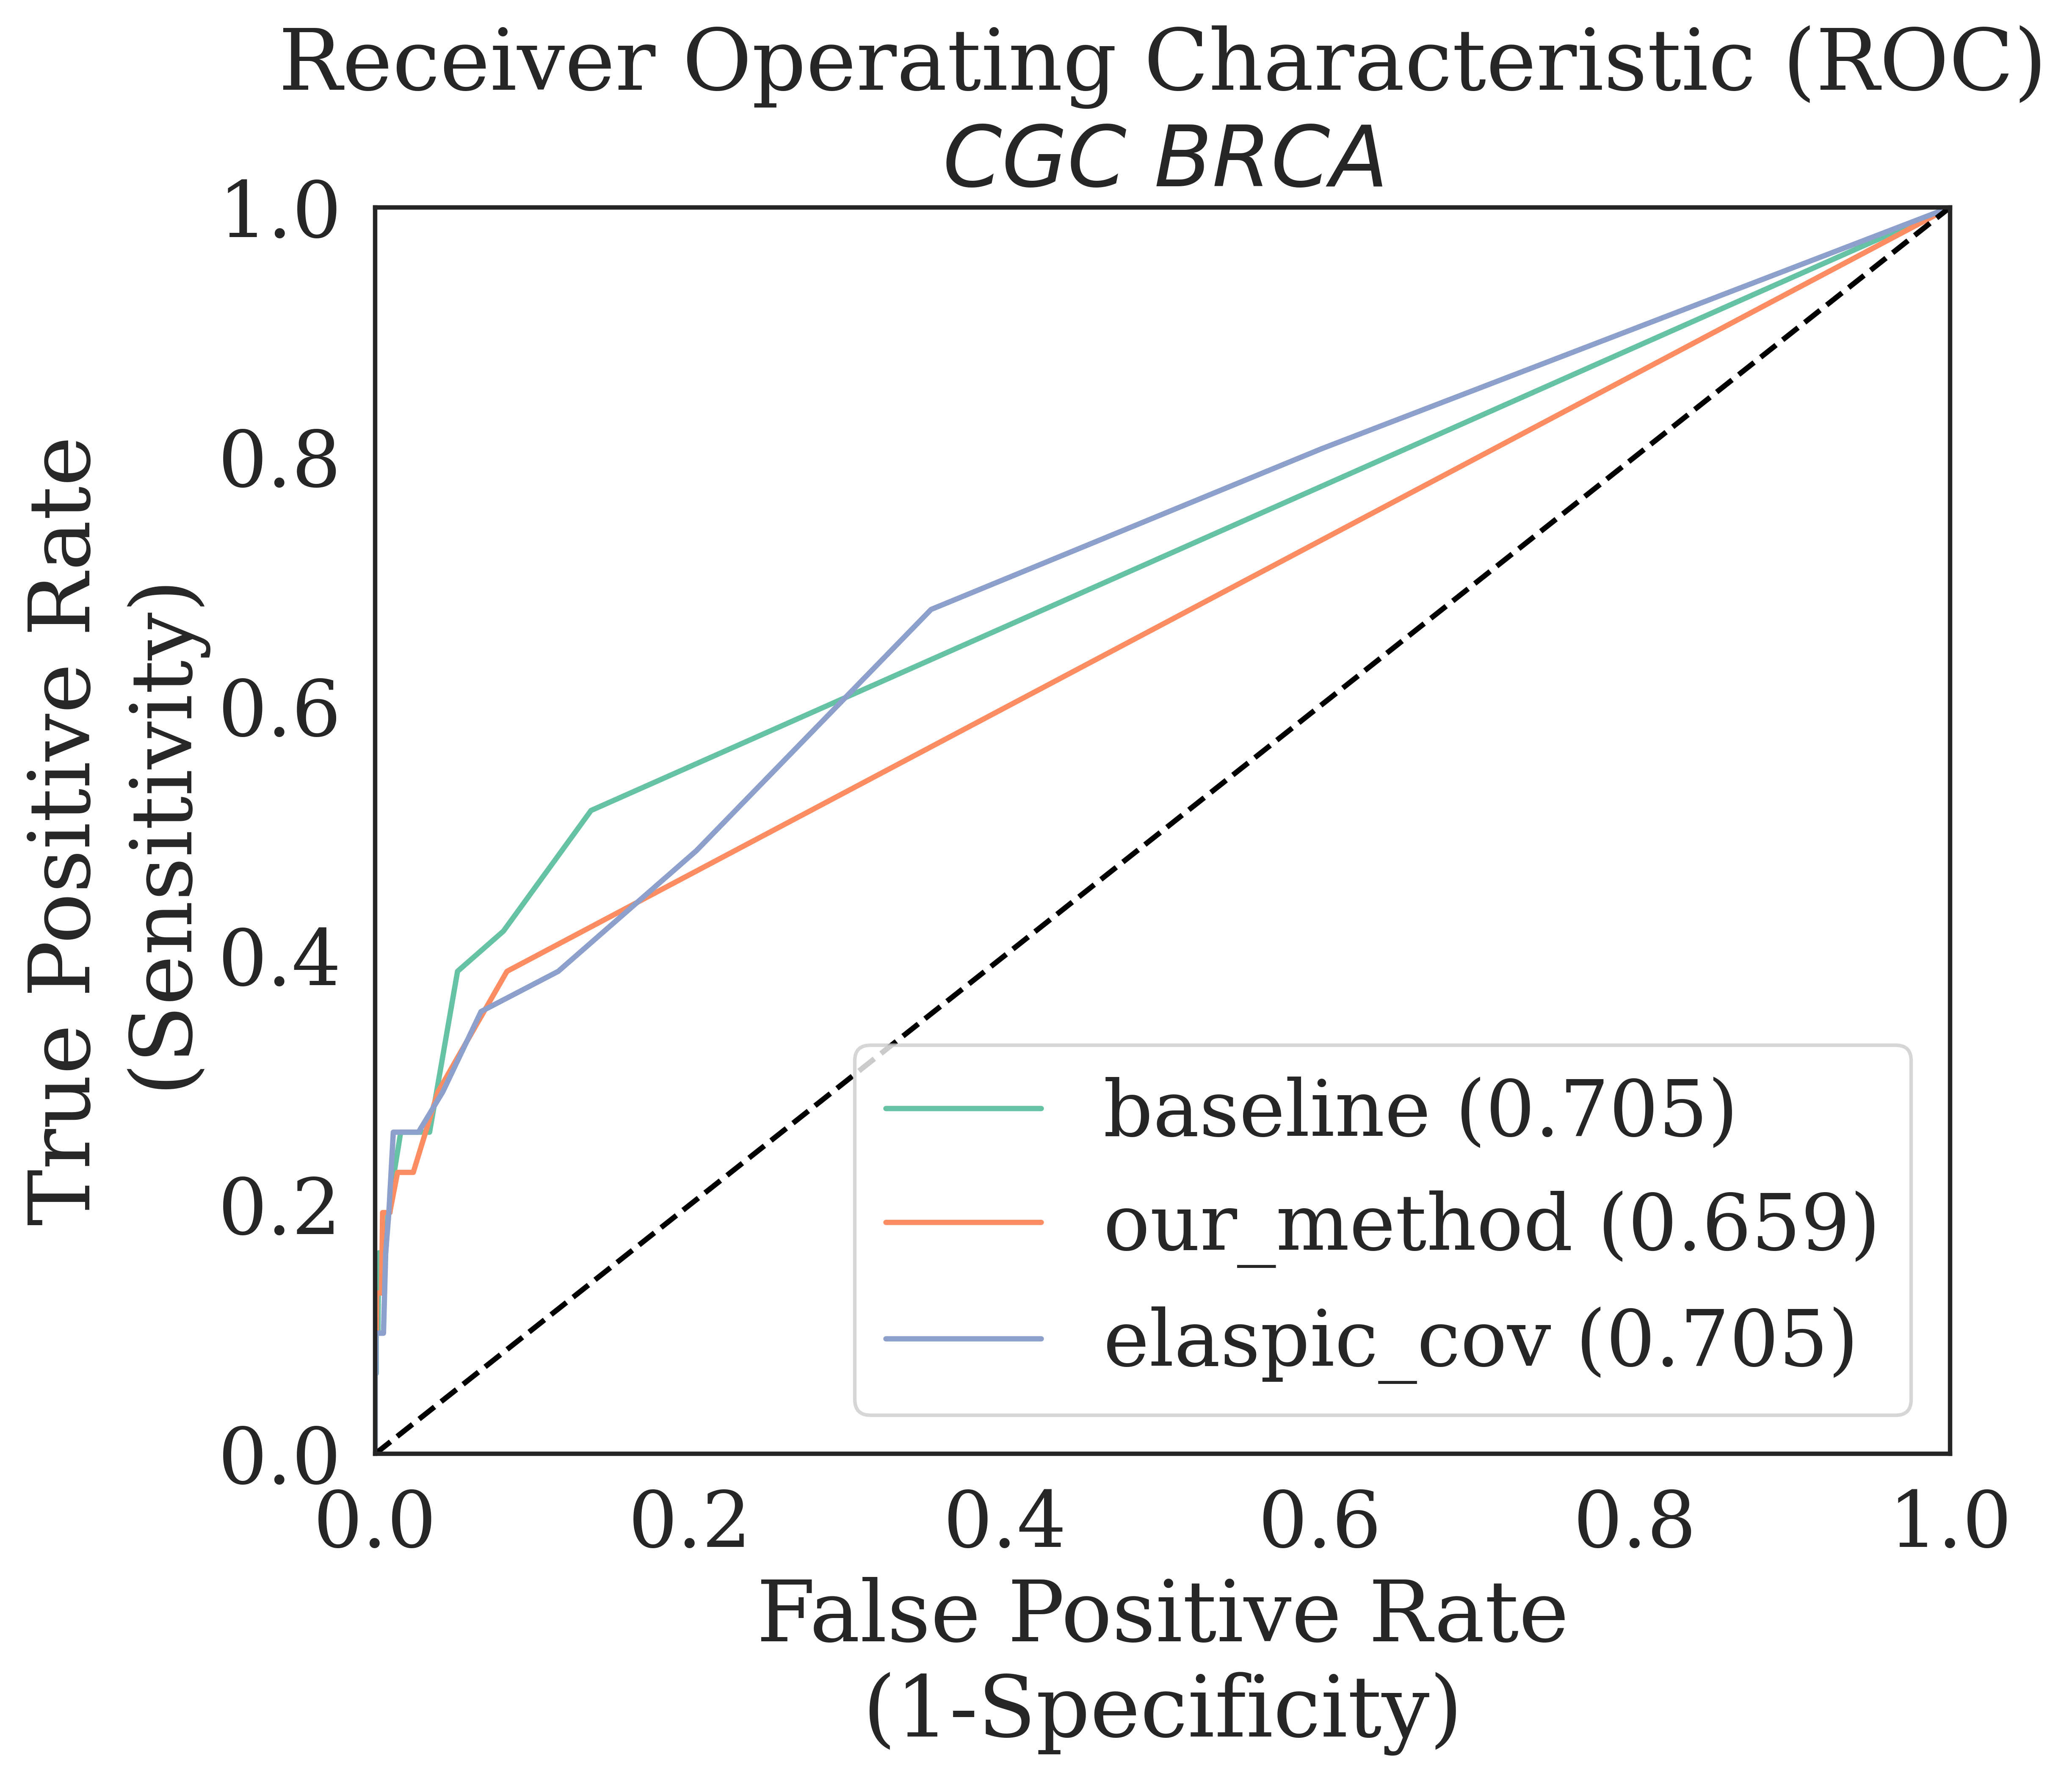

2022-06-17 15:06:15 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.705
2022-06-17 15:06:15 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.659
2022-06-17 15:06:15 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.705


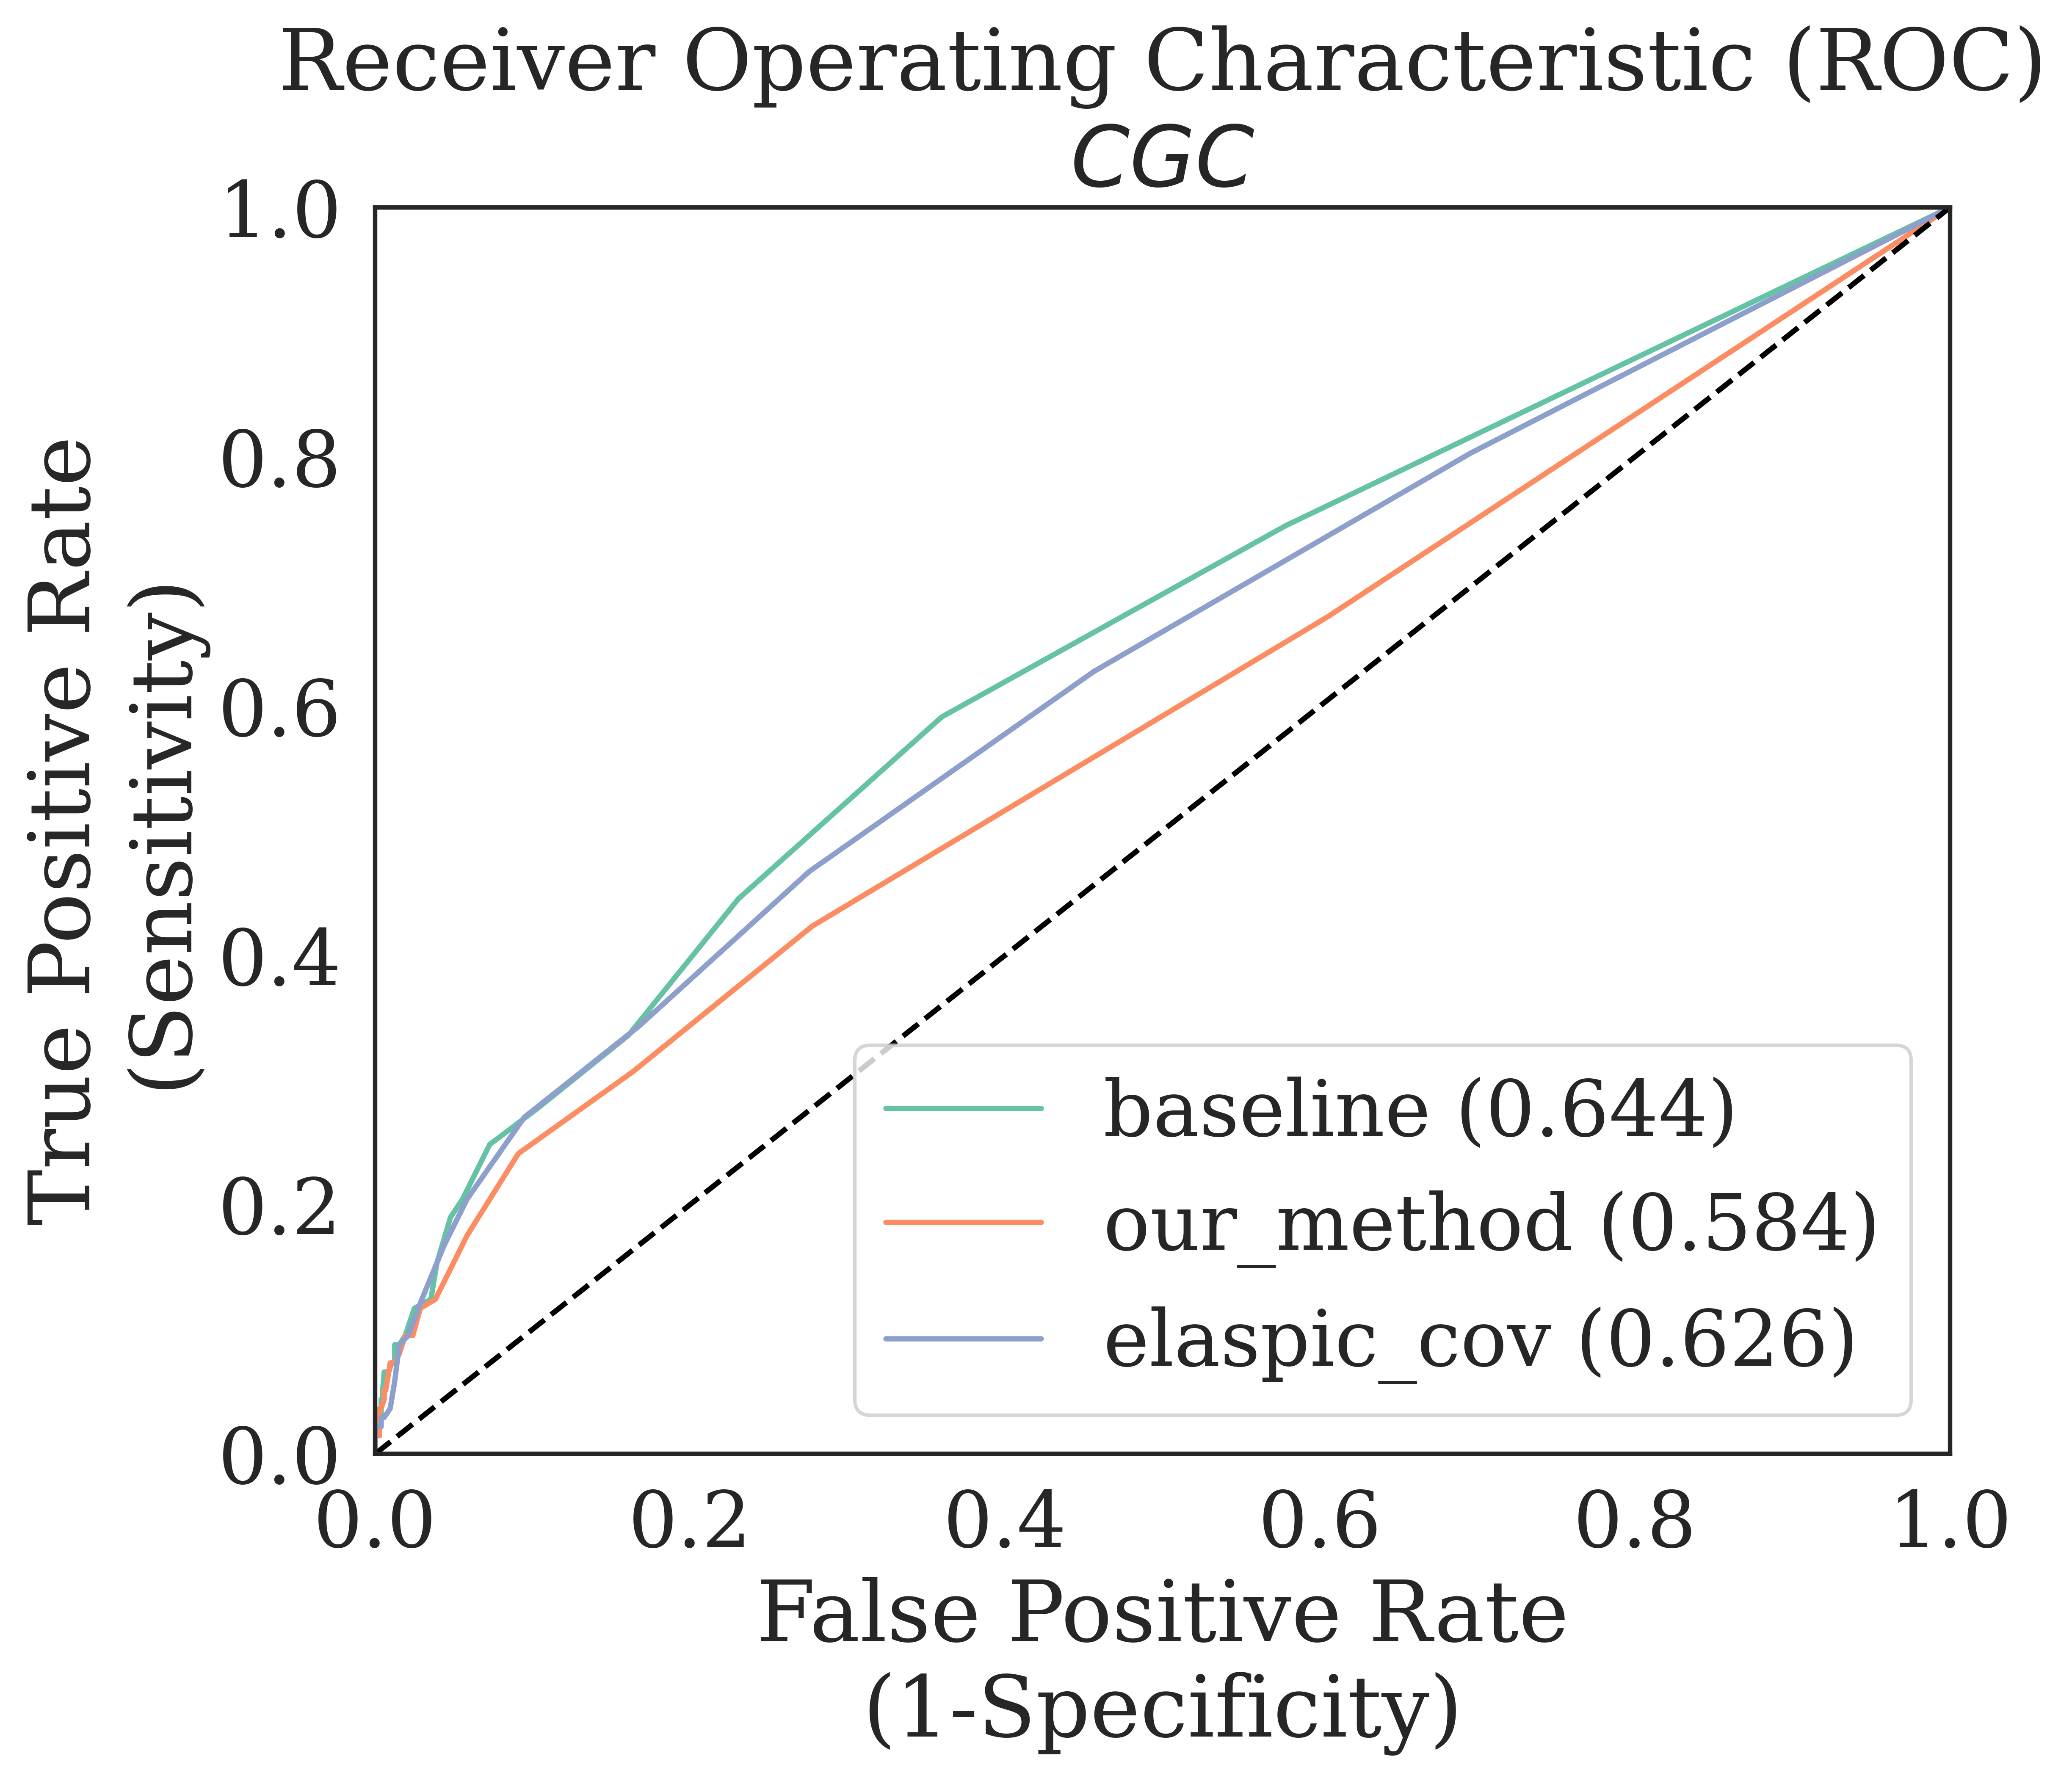

2022-06-17 15:06:18 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.644
2022-06-17 15:06:18 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.584
2022-06-17 15:06:18 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.626


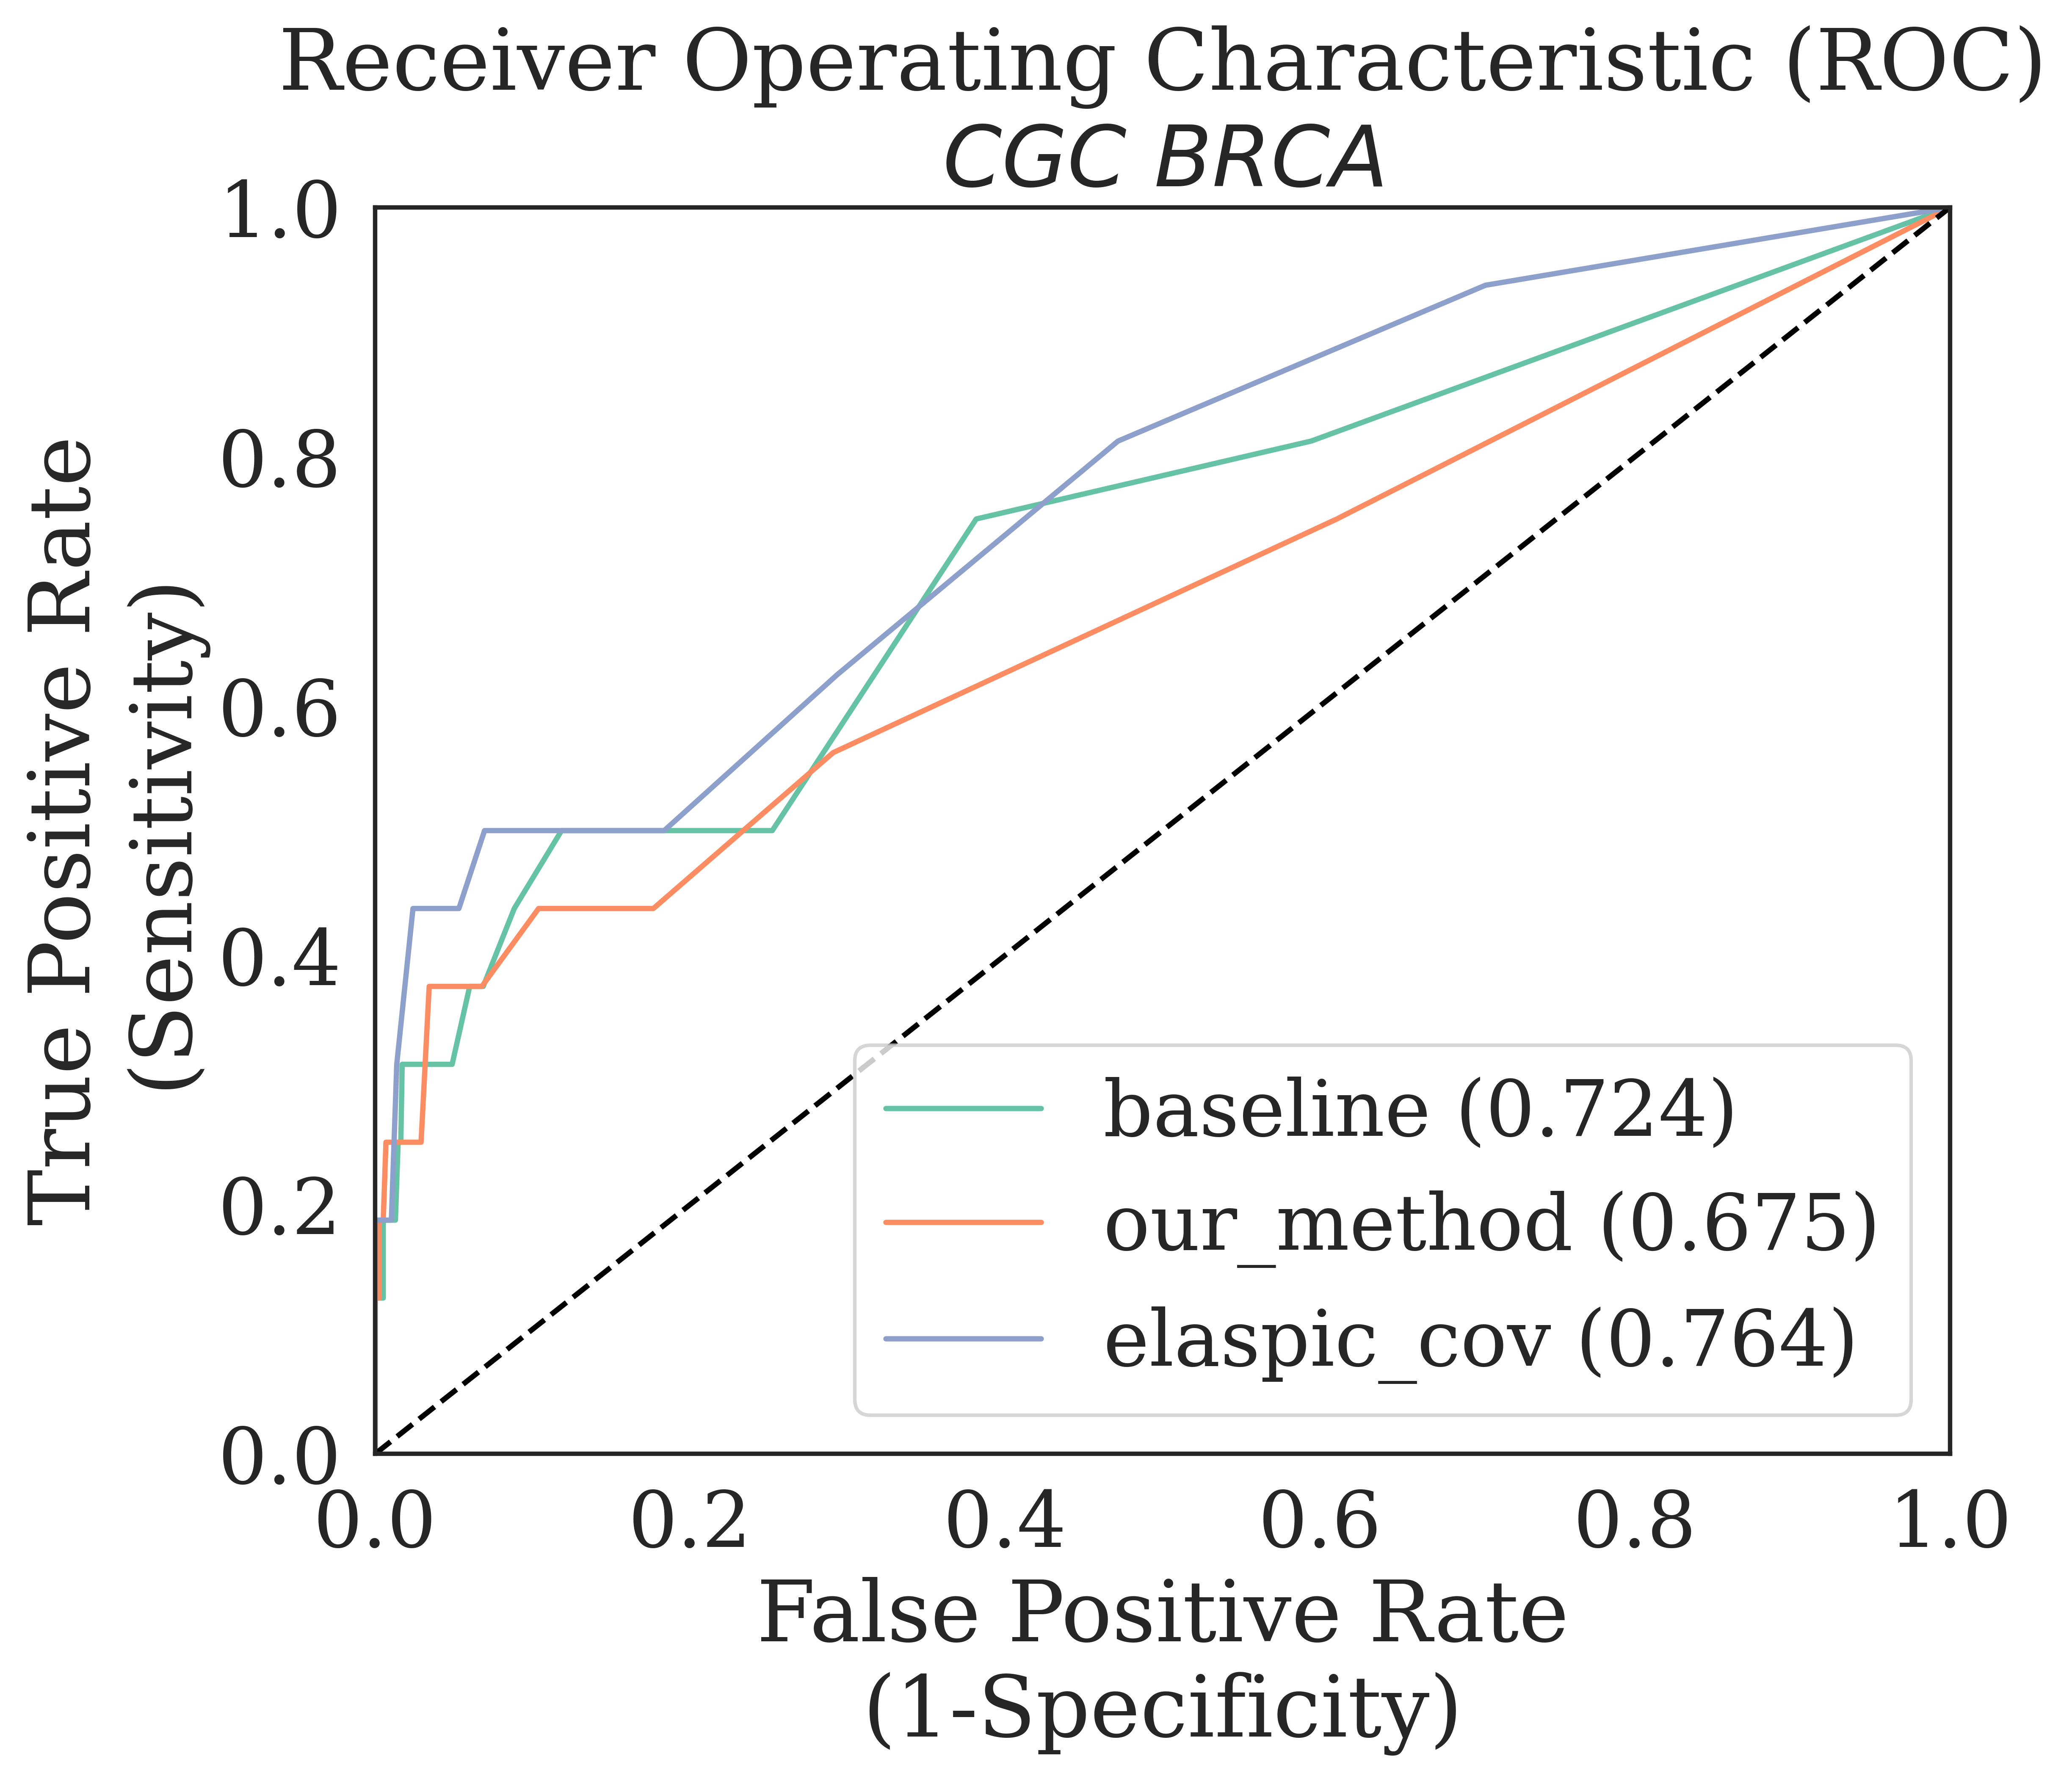

2022-06-17 15:06:22 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.724
2022-06-17 15:06:22 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.675
2022-06-17 15:06:22 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.764


In [26]:
predator_analysis.run_roc_curve_analysis(
    preliminary_data_name="brca_preliminary_data",
    state_variables=["CGC_STATUS", "CGC_STATUS (BRCA)"]
)

In [27]:
predator_analysis.export_auc_scores("auc_scores_cgc", overwrite=False)

default default_brca baseline_nonzero baseline_nonzero_brca
Method                                                                 
BASELINE      0.594        0.705            0.644                 0.724
OURS          0.566        0.659            0.584                 0.675
ELASPIC_COV   0.562        0.705            0.626                 0.764

2022-06-17 15:06:55 | INFO     | helpers.helpers_analysis.common | AUC scores are saved into file ..\data\predictions_datasets\brca_prediction_2022-06-17\ed35a3a3\auc_scores_cgc_2022-06-17.csv


# Save to Excel file

In [28]:
from helpers.helpers_analysis.common import save_to_excel

In [29]:
save_to_excel(
    prediction_file_path=predator_analysis.prediction_data_path,
    preliminary_data=predator_analysis.data_materials["brca_preliminary_data"],
    file_name="brca_preliminary_data_cgc",
    export_flag=True
)

2022-06-17 15:07:10 | DEBUG    | helpers.helpers_analysis.common | ..\data\predictions_datasets\brca_prediction_2022-06-17\ed35a3a3\brca_preliminary_data_cgc_2022-06-17.xlsx is exported.
2022-06-17 15:07:10 | DEBUG    | helpers.helpers_analysis.common | descriptions_..\data\predictions_datasets\brca_prediction_2022-06-17\ed35a3a3\brca_preliminary_data_cgc_2022-06-17_descriptions.xlsx is exported.


In [29]:
# done.